# Data Handling start

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 
from sklearn import preprocessing 

mounting the google drive to colab

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


importing the data set

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Project data/Kenya data.csv',header=0)

printing the shape of the data (rows and columns)

In [ ]:
print(df.shape)

(499, 7)


checking the first 20 rows


In [ ]:
df.sample(20)

,County,Crop_Year,Area(ha),Yield(ha),max _temp(°C),min_temp(°C),Rainfall(mm)
250,Uasin Gishu,2000,19741.0,48582.0,23.89,19.8400,1115
54,Narok,1984,48791.0,169109.0,28.43,19.8700,760
59,Uasin Gishu,1984,23410.0,57609.0,24.21,19.9300,1110
472,Samburu,2019,800.0,3240.0,29.84,22.9800,510
359,Meru,2010,13097.0,25508.0,24.32,20.2200,1831
206,Laikipia,1997,8900.0,28459.0,22.32,17.1160,990
444,Nakuru,2017,20500.0,86523.0,23.56,18.8000,963
157,Elgeyo Marakwet,1993,1153.0,3528.0,25.79,19.6800,832
113,Nakuru,1989,14850.0,47460.0,23.37,18.7200,980
18,Narok,1981,NaN,21213.0,28.31,19.8300,790


Specifying the number of rows and columns the dataset has

In [ ]:
print("The dataset has %d rows and %d columns" % df.shape)

The dataset has 499 rows and 7 columns


# Data Cleaning:Handling Missing Values

In [ ]:
print('The dataset has total of',df.isnull().sum().sum(),'missing Values')

The dataset has total of 55 missing Values


To check the number of missing values in each column

In [ ]:
df.isnull().sum()

County            0
Crop_Year         0
Area(ha)         21
Yield(ha)        28
max _temp(°C)     4
min_temp(°C)      2
Rainfall(mm)      0
dtype: int64

checking the percentage of null values present in each column

make the list of features which has missing values

In [ ]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

printing the feature name and the percentage of missing values

In [ ]:
for feature in features_with_na:
  print(feature,np.round(df[feature].isnull().mean(),4), ' % missing values')

Area(ha) 0.0421  % missing values
Yield(ha) 0.0561  % missing values
max _temp(°C) 0.008  % missing values
min_temp(°C) 0.004  % missing values


Checking the data typesof the variable 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   County         499 non-null    object 
 1   Crop_Year      499 non-null    int64  
 2   Area(ha)       478 non-null    float64
 3   Yield(ha)      471 non-null    float64
 4   max _temp(°C)  495 non-null    float64
 5   min_temp(°C)   497 non-null    float64
 6   Rainfall(mm)   499 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 27.4+ KB


sorting the features in descending order with their percentage mean of missing values

In [ ]:
df.isnull().mean().sort_values(ascending=False)*100

Yield(ha)        5.611222
Area(ha)         4.208417
max _temp(°C)    0.801603
min_temp(°C)     0.400802
County           0.000000
Crop_Year        0.000000
Rainfall(mm)     0.000000
dtype: float64

creating a missing value table


In [ ]:
def missing_values_table(df):
  #total missing values
  mis_val = df.isnull().sum()

  #percentage of missing value
  mis_val_percent = 100 * df.isnull().sum() / len(df)

  #make a table wi the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

  #rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Number of Missing Values', 1 : 'percentage(%)'})

  #sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
  'percentage(%)', ascending=False).round(1)

  #print the summary information
  print("the dataset has a total of " +str(df.shape[1]) + "columns.\n"
  "There are " + str(mis_val_table_ren_columns.shape[0]) +
  "columns that have missing values." )

  #return the data frame with the missing information

  return mis_val_table_ren_columns



Missing values table

In [ ]:
missing_values_table(df)

the dataset has a total of 7columns.
There are 4columns that have missing values.


,Number of Missing Values,percentage(%)
Yield(ha),28,5.6
Area(ha),21,4.2
max _temp(°C),4,0.8
min_temp(°C),2,0.4


We handle the missing values of the yield  using median

In [ ]:
df['Yield(ha)'].fillna(df['Yield(ha)'].median(), inplace=True)

We handle the missing values of area using median

In [ ]:
df['Area(ha)'].fillna(df['Area(ha)'].median(), inplace=True)

We handle the missing values of maximum temparature using median

In [ ]:
df['max _temp(°C)'].fillna(df['max _temp(°C)'].median(), inplace=True)

We handle the missing values of manimum temparature using median

In [ ]:
df['min_temp(°C)'].fillna(df['min_temp(°C)'].median(), inplace=True)

let's check wether or not the missing values are replace by the mode and median value

In [ ]:
df.isnull().sum()

County           0
Crop_Year        0
Area(ha)         0
Yield(ha)        0
max _temp(°C)    0
min_temp(°C)     0
Rainfall(mm)     0
dtype: int64

In [ ]:
print(df.isnull().sum().sum(), "Missing value: All the missing values are handled")

0 Missing value: All the missing values are handled


Describing the data interms of mean  median standard deviation 

In [ ]:
df.describe()

,Crop_Year,Area(ha),Yield(ha),max _temp(°C),min_temp(°C),Rainfall(mm)
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,2000.458918,10272.893788,30482.105210,29.861431,19.034633,1177.478958
std,12.177231,15995.581115,51690.003405,104.453809,2.328214,406.195965
min,1980.000000,30.000000,90.000000,22.300000,12.022000,480.000000
25%,1990.000000,909.500000,3242.000000,23.560000,18.405000,925.000000
50%,2000.000000,2198.000000,8308.000000,24.540000,19.499000,1115.000000
75%,2011.000000,13295.000000,28706.000000,25.670000,20.234950,1430.000000
max,2021.000000,70884.000000,254213.000000,2358.000000,23.410000,1997.000000


showing the columns with their number of categories each variable is having

In [ ]:
for col in df.columns:
  print(col, ':', len(df[col].unique()), 'categories')

County : 13 categories
Crop_Year : 42 categories
Area(ha) : 406 categories
Yield(ha) : 452 categories
max _temp(°C) : 251 categories
min_temp(°C) : 345 categories
Rainfall(mm) : 301 categories


# Numerical Variables 

list of numerical variables

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [ ]:
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  6


Visualize the numerical variables

In [ ]:
df[numerical_features].sample(5)

,Crop_Year,Area(ha),Yield(ha),max _temp(°C),min_temp(°C),Rainfall(mm)
60,1985,500.0,1430.0,24.80,19.4600,1190
277,2003,481.0,1741.0,23.64,17.6300,1956
234,1999,2012.0,8724.0,2358.00,19.1200,1420
233,1999,52923.0,183473.0,28.31,19.8118,764
472,2019,800.0,3240.0,29.84,22.9800,510


# Categorical Variables

list the categorical variables

In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['County']

checking the number of variables in the categorical feature

In [ ]:
for feature in categorical_features:
  print('{}: Number of categories are {}'.format(feature,len(df[feature].unique())))

County: Number of categories are 13


In [ ]:
df_dict = dict(zip([i for i in df.columns] , [pd.DataFrame(df[i].unique(), columns=[i]) for i in df.columns]))

The Location categorical list shows that some of the list are the same with different spelling so we need to fix that.

In [ ]:
df_dict['County']

,County
0,Bungoma
1,Elgeyo Marakwet
2,Kericho
3,Laikipia
4,Meru
5,Nakuru
6,Narok
7,Nyandarua
8,Nyeri
9,Samburu


In [ ]:
df.County.replace({'Elgeyo Marakwet': 'Elgeyo_Marakwet','Uasin Gishu':'Uasin_Gishu','Elgeyo Marakwet1990':'Elgeyo_Marakwet'}, inplace=True)

showing the unique list found in the country category


In [ ]:
df_dict['County']

,County
0,Bungoma
1,Elgeyo Marakwet
2,Kericho
3,Laikipia
4,Meru
5,Nakuru
6,Narok
7,Nyandarua
8,Nyeri
9,Samburu


Analyzing and checking the importance of year variable to check whether there is a relation between the year and the yield

Text(0.5, 1.0, 'Yield vs Year')

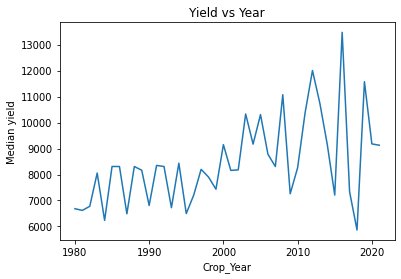

In [ ]:
df.groupby('Crop_Year')['Yield(ha)'].median().plot()
plt.xlabel('Crop_Year')
plt.ylabel('Median yield')
plt.title("Yield vs Year")

checking the relationship between yield and land area

Text(0.5, 1.0, 'Yield vs land Area')

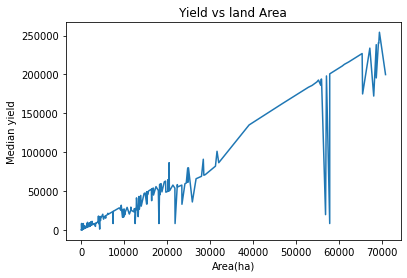

In [ ]:
df.groupby('Area(ha)')['Yield(ha)'].median().plot()
plt.xlabel('Area(ha)')
plt.ylabel('Median yield')
plt.title("Yield vs land Area")

checking the relationship between yield and mean temparature

Text(0.5, 1.0, 'Yield vs Temparature')

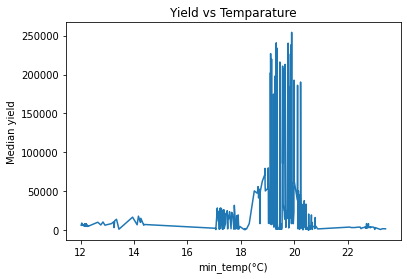

In [ ]:
df.groupby('min_temp(°C)')['Yield(ha)'].median().plot()
plt.xlabel('min_temp(°C)')
plt.ylabel('Median yield')
plt.title("Yield vs Temparature")

checking the relationship between yield and rainfall

Text(0.5, 1.0, 'Yield vs Rainfall')

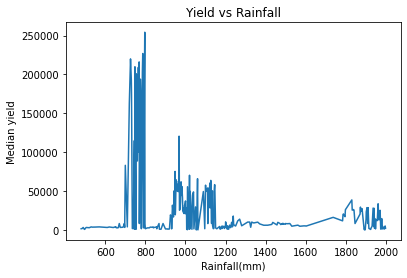

In [ ]:
df.groupby('Rainfall(mm)')['Yield(ha)'].median().plot()
plt.xlabel('Rainfall(mm)')
plt.ylabel('Median yield')
plt.title("Yield vs Rainfall")

showing the relationship of the categorical variable with respect to yield

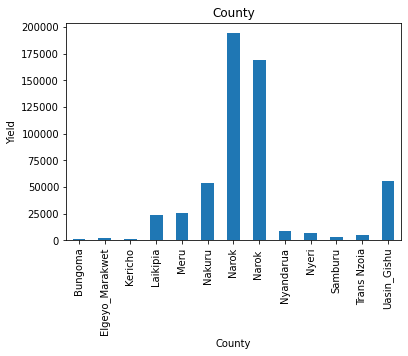

In [ ]:
for feature in categorical_features:
  data=df.copy()
  data.groupby(feature)['Yield(ha)'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('Yield')
  plt.title(feature)
  plt.show()

we drop the year variable, it is not a factor in the prediction

In [ ]:
df=df.drop(['Crop_Year'],axis=1)

Display the new data 

In [ ]:
df.sample(3)

,County,Area(ha),max _temp(°C),min_temp(°C),Rainfall(mm),Yield(ha)
171,Laikipia,7845,22.48,17.2800,975,25085.0
412,Samburu,600,30.56,22.4900,485,1880.0
349,Narok,67231,28.41,19.3564,748,233797.0


# Data Transformation:Changing categorical feature to Numeric

Applying one hot encoding to convert the categorical value to numerical values

In [ ]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Area(ha),max _temp(°C),min_temp(°C),Rainfall(mm),Yield(ha),County_Elgeyo_Marakwet,County_Kericho,County_Laikipia,County_Meru,County_Nakuru,County_Narok,County_Narok,County_Nyandarua,County_Nyeri,County_Samburu,County_Trans Nzoia,County_Uasin_Gishu
0,430,24.68,19.42,1234,1229.0,0,0,0,0,0,0,0,0,0,0,0,0
1,458,25.65,19.30,931,1401.0,1,0,0,0,0,0,0,0,0,0,0,0
2,620,23.74,17.32,1978,2244.0,0,1,0,0,0,0,0,0,0,0,0,0
3,8193,22.43,17.36,1010,26198.0,0,0,1,0,0,0,0,0,0,0,0,0
4,11570,24.51,19.64,1970,25304.0,0,0,0,1,0,0,0,0,0,0,0,0


correlation:how one feature is correlated with the other features

In [ ]:
df.corr()

,Area(ha),max _temp(°C),min_temp(°C),Rainfall(mm),Yield(ha),County_Elgeyo_Marakwet,County_Kericho,County_Laikipia,County_Meru,County_Nakuru,County_Narok,County_Narok,County_Nyandarua,County_Nyeri,County_Samburu,County_Trans Nzoia,County_Uasin_Gishu
Area(ha),1.000000,-0.018351,0.090781,-0.276113,0.958155,-0.175372,-0.182305,-0.066279,0.020822,0.162977,0.769838,0.283015,-0.153843,-0.141571,-0.179680,-0.161007,0.230471
max _temp(°C),-0.018351,1.000000,0.011447,0.015786,-0.013600,-0.012568,-0.018113,-0.021545,-0.014860,-0.018411,-0.003759,-0.001672,0.145088,-0.013796,0.001209,-0.012790,-0.016754
min_temp(°C),0.090781,0.011447,1.000000,-0.367672,0.073867,0.107181,-0.180877,-0.215925,0.126346,-0.025248,0.070946,0.032877,0.016284,-0.808494,0.479918,0.188017,0.131494
Rainfall(mm),-0.276113,0.015786,-0.367672,1.000000,-0.304087,-0.263147,0.576085,-0.155661,0.514583,-0.155412,-0.276719,-0.131072,0.171300,0.141427,-0.432330,0.021361,-0.060850
Yield(ha),0.958155,-0.013600,0.073867,-0.304087,1.000000,-0.161872,-0.165139,-0.048924,-0.036776,0.179787,0.769921,0.315385,-0.128060,-0.133878,-0.158821,-0.150280,0.126732
County_Elgeyo_Marakwet,-0.175372,-0.012568,0.107181,-0.263147,-0.161872,1.000000,-0.090704,-0.090704,-0.088325,-0.090704,-0.082174,-0.035688,-0.089520,-0.090704,-0.090704,-0.090704,-0.089520
County_Kericho,-0.182305,-0.018113,-0.180877,0.576085,-0.165139,-0.090704,1.000000,-0.091904,-0.089493,-0.091904,-0.083261,-0.036160,-0.090704,-0.091904,-0.091904,-0.091904,-0.090704
County_Laikipia,-0.066279,-0.021545,-0.215925,-0.155661,-0.048924,-0.090704,-0.091904,1.000000,-0.089493,-0.091904,-0.083261,-0.036160,-0.090704,-0.091904,-0.091904,-0.091904,-0.090704
County_Meru,0.020822,-0.014860,0.126346,0.514583,-0.036776,-0.088325,-0.089493,-0.089493,1.000000,-0.089493,-0.081077,-0.035212,-0.088325,-0.089493,-0.089493,-0.089493,-0.088325
County_Nakuru,0.162977,-0.018411,-0.025248,-0.155412,0.179787,-0.090704,-0.091904,-0.091904,-0.089493,1.000000,-0.083261,-0.036160,-0.090704,-0.091904,-0.091904,-0.091904,-0.090704


plotting this correlation

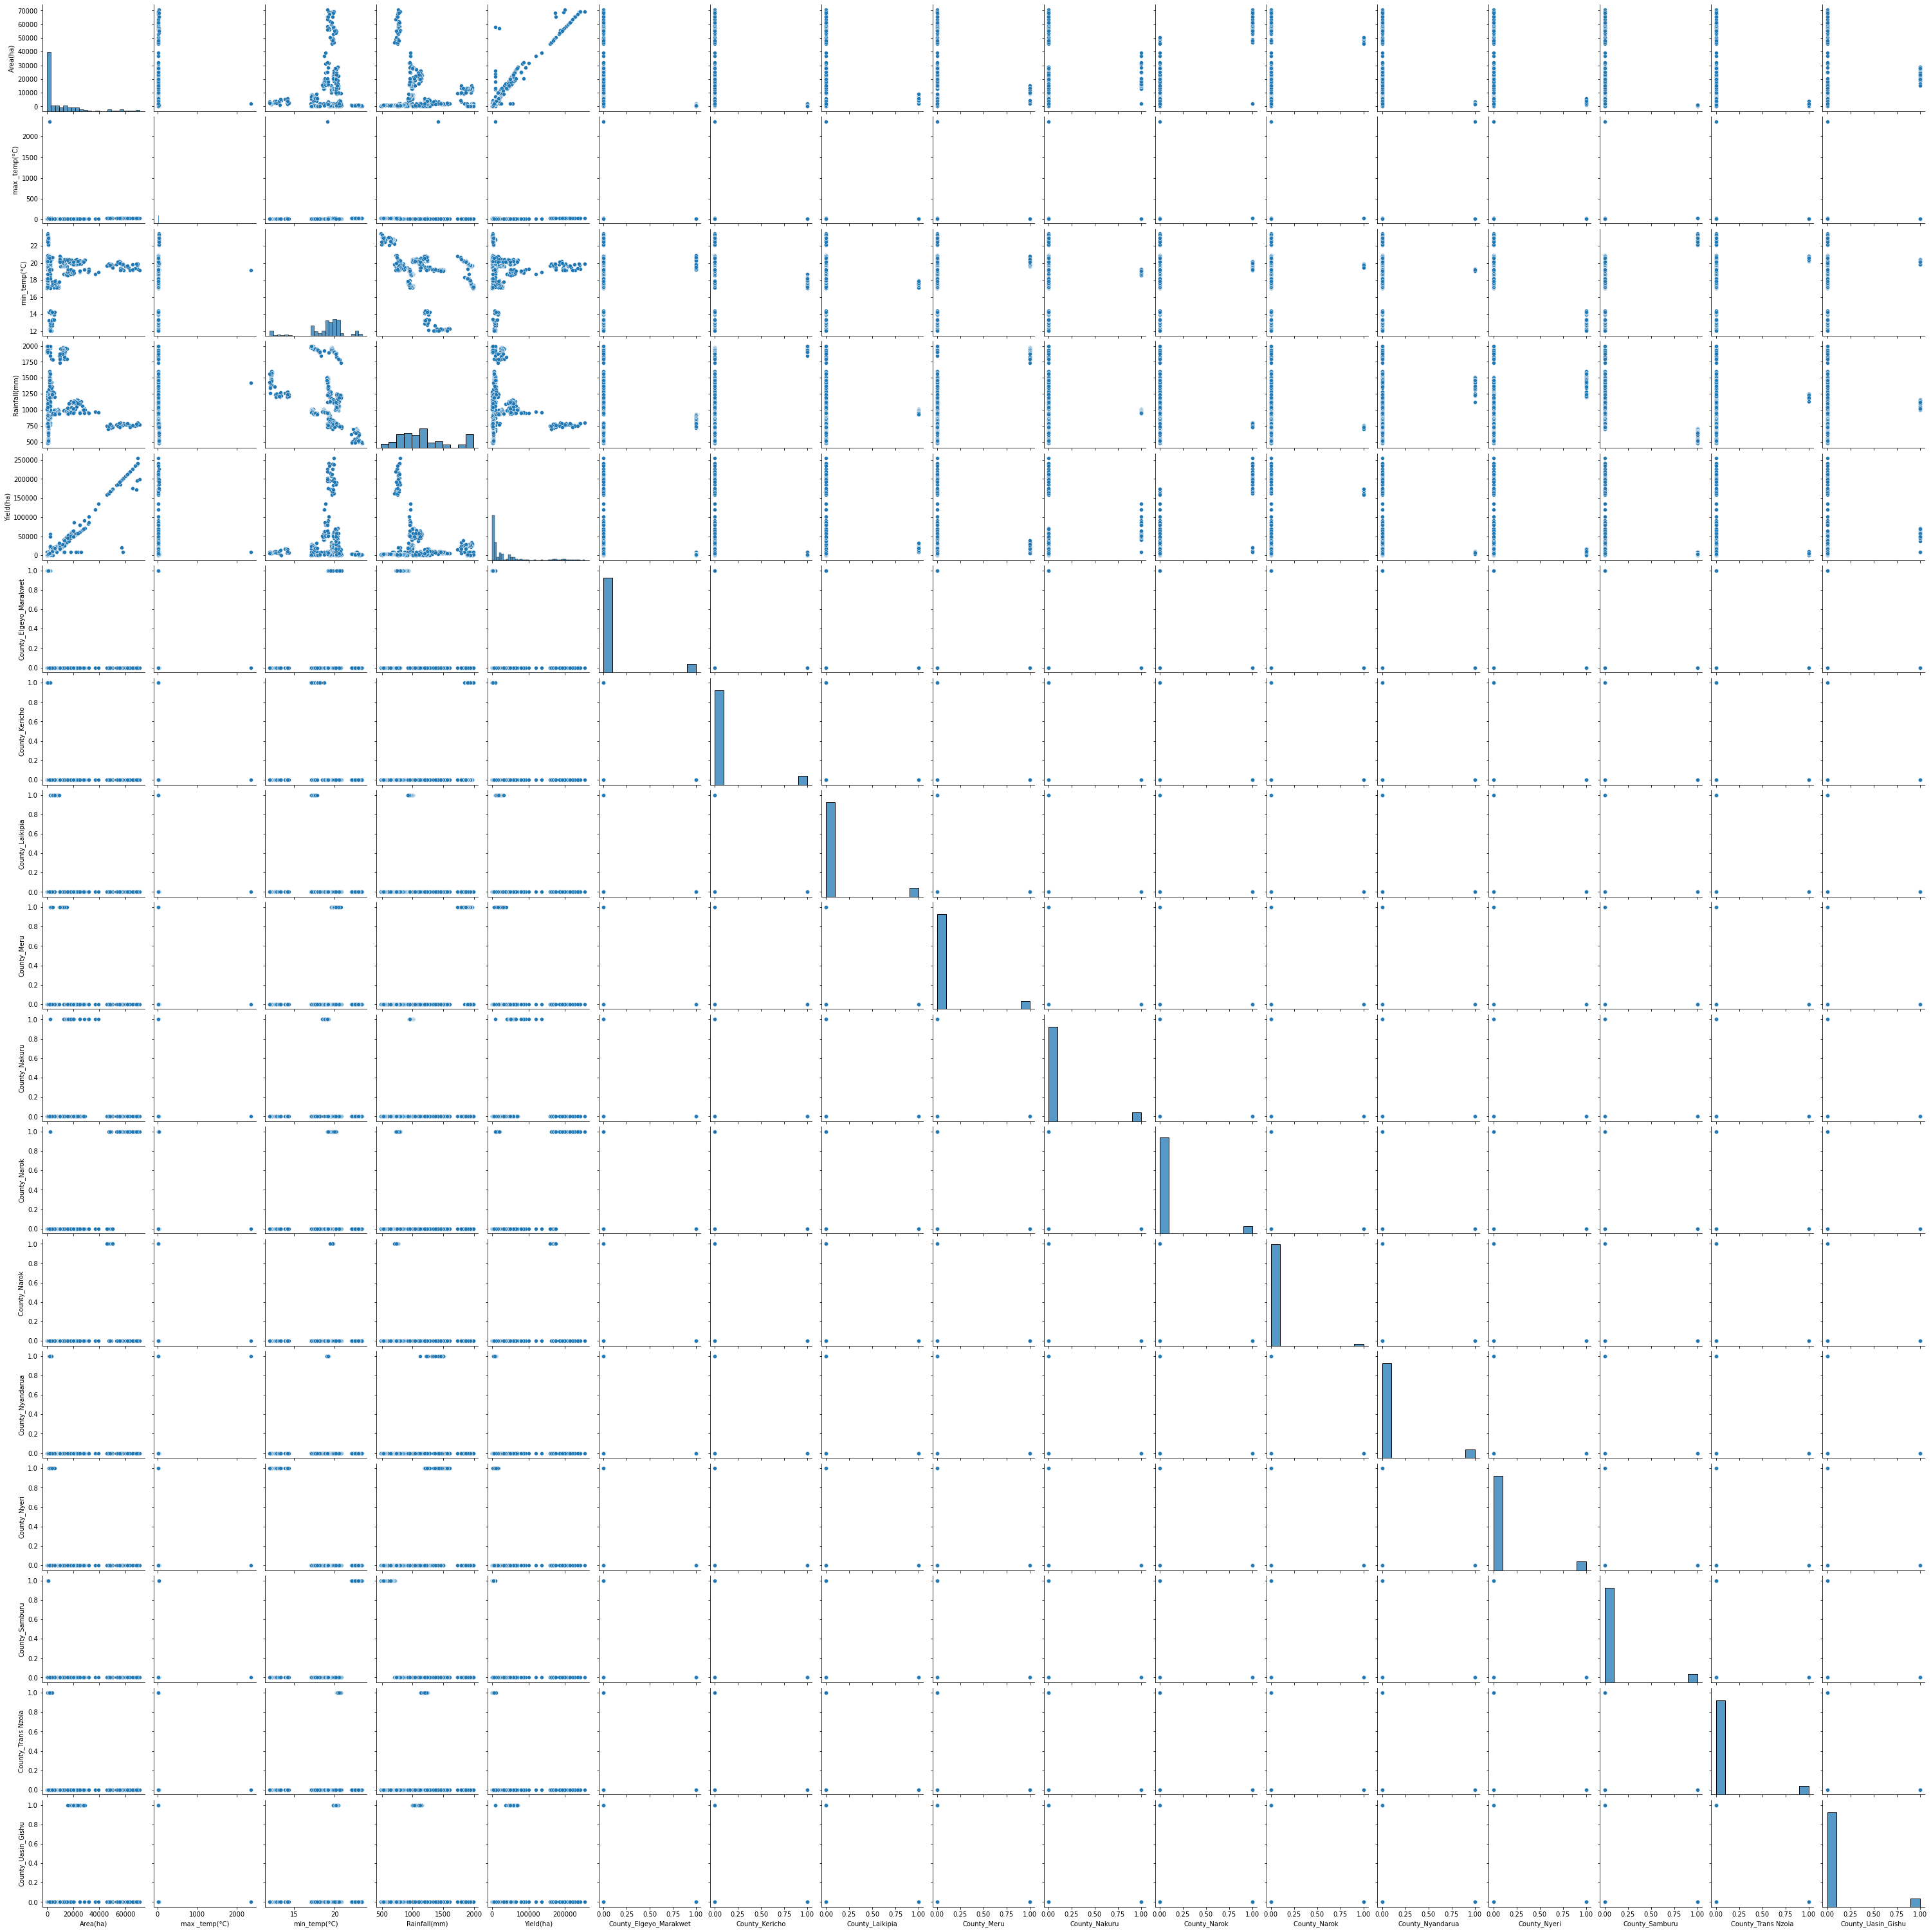

In [ ]:
import seaborn as sns
sns.pairplot(df)

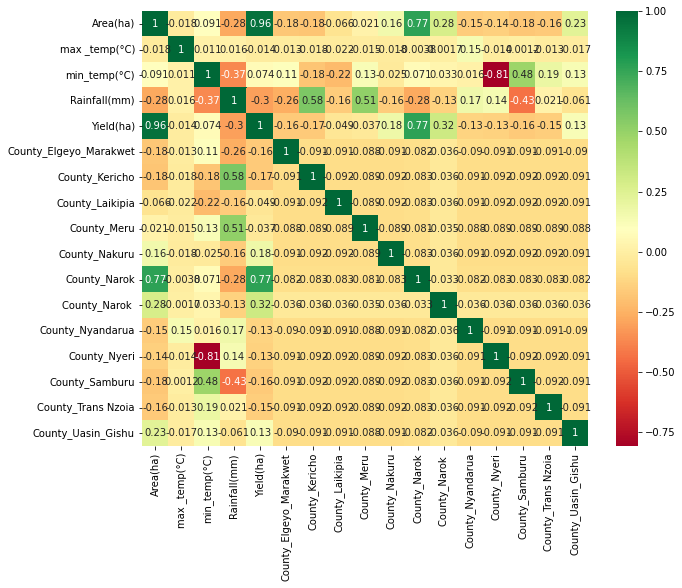

In [ ]:
import seaborn as sns
#get correlations of each feature in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

from this  hitmap we can conclude that there is no multicollinearity in the features. So  we can take all the faetures for building the model

export this data and build the model


In [ ]:
data.to_csv('cleaned data.csv', index=False)

# Building the Model

importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

 For ignoring warnings to view clean output

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import the dataset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Project data/cleaned data.csv',header=0)

Checking the sample

In [ ]:
df.sample(20)

,County,Area(ha),max _temp(°C),min_temp(°C),Rainfall(mm),Yield(ha)
345,Kericho,371,23.20,17.8800,1942,1343.0
200,Samburu,842,30.39,22.6300,652,3410.0
233,Narok,52923,28.31,19.8118,764,183473.0
496,Samburu,1000,29.31,22.9000,520,4050.0
305,Narok,68723,28.34,19.8787,765,238248.0
408,Nakuru,32057,23.78,19.1000,950,86497.0
38,Kericho,590,23.56,17.3700,1990,2136.0
282,Nyandarua,2434,23.56,19.1600,1120,10554.0
332,Elgeyo_Marakwet,950,25.47,20.2500,793,2568.0
5,Nakuru,16709,23.34,18.6300,1010,53401.0


check a small sample of the data 

In [ ]:
df.head()

,County,Area(ha),max _temp(°C),min_temp(°C),Rainfall(mm),Yield(ha)
0,Bungoma,430,24.68,19.42,1234,1229.0
1,Elgeyo_Marakwet,458,25.65,19.30,931,1401.0
2,Kericho,620,23.74,17.32,1978,2244.0
3,Laikipia,8193,22.43,17.36,1010,26198.0
4,Meru,11570,24.51,19.64,1970,25304.0


separating independent and dependent feature

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,5]

view the data of the independent variable

In [ ]:
X.head()

,County,Area(ha),max _temp(°C),min_temp(°C),Rainfall(mm)
0,Bungoma,430,24.68,19.42,1234
1,Elgeyo_Marakwet,458,25.65,19.30,931
2,Kericho,620,23.74,17.32,1978
3,Laikipia,8193,22.43,17.36,1010
4,Meru,11570,24.51,19.64,1970


checking the shape of X which represent the independent varibales 

In [ ]:
X.shape

(499, 5)

checking the contents of y which is the dependent variable

In [ ]:
y.head()

0     1229.0
1     1401.0
2     2244.0
3    26198.0
4    25304.0
Name: Yield(ha), dtype: float64

Shows the number of columns after creating dummy variables which handles the categorical variables

In [ ]:
pd.get_dummies(df,drop_first=True).shape

(499, 17)

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.sample(4)

,Area(ha),max _temp(°C),min_temp(°C),Rainfall(mm),County_Elgeyo_Marakwet,County_Kericho,County_Laikipia,County_Meru,County_Nakuru,County_Narok,County_Narok,County_Nyandarua,County_Nyeri,County_Samburu,County_Trans Nzoia,County_Uasin_Gishu
183,8400,22.56,17.24,973,0,0,1,0,0,0,0,0,0,0,0,0
115,1850,23.47,19.10,1480,0,0,0,0,0,0,0,1,0,0,0,0
333,540,23.71,18.15,1914,0,1,0,0,0,0,0,0,0,0,0,0
43,1800,23.68,19.19,1490,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
X.shape

(499, 16)

# Standardization

The standardization of features the need to do this is because the features which are used eg rainfall, temparatures all are measured using different metrics


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

show the wheather the features are in standardized format or not(the standardization of the data was done using z score method and hence the results where the mean is 0 and the standard deviation is 1)

In [ ]:
print("Mean of the dataset:", np.mean(X).round(8))
print("Standard deviation of the dataset: ", np.std(X).round(8))

Mean of the dataset: 0.0
Standard deviation of the dataset:  1.0


splitting the data 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print the number of instances of the training and testing set(80 -20)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(399, 16)
(100, 16)
(399,)
(100,)


# Model Building with Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import time
start_time = time.time()
RF=RandomForestRegressor()
# feeding the training data into the model
RF.fit(X_train, y_train)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 0.23447227478027344 sec


predicting the values for x-test

In [ ]:
predictions=RF.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6759.606600000002
MSE: 438815133.71850604
RMSE: 20947.914782109125


In [ ]:
RF.score(X_test,y_test)

0.8443074484419465

In [ ]:
RF.score(X_train,y_train)

0.9877332665875403

In [ ]:
y_pred=RF.predict(X_test)

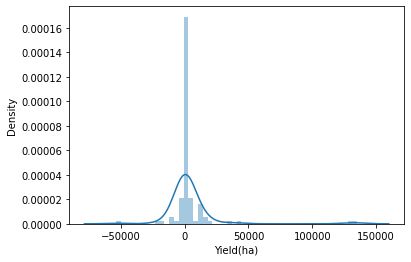

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

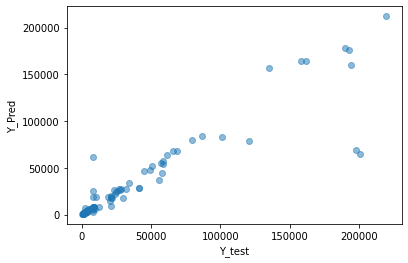

In [ ]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_Pred")
plt.show()

In [ ]:
metrics.r2_score(y_test,y_pred)

0.8443074484419465

predicting a yield


In [ ]:
RF.predict(X_test)

array([  2040.32,   1046.01,  26604.34,   8347.83,   4213.63,    994.09,
        62161.79,   7660.63,  63980.46,   3923.72,   6505.25,   5165.23,
         3226.14,   3154.16,  28459.69,  17955.3 ,  19308.16,   8693.48,
        48026.74,   1507.17,  27773.79,   1631.41, 175821.81,   1426.89,
        14470.71,   3348.02,  18338.94,   8016.39,  28529.31,   5609.41,
        19186.3 ,  33849.05,   5173.04,   2186.49,   2852.13,   7488.6 ,
       159985.36,   1091.93,  47184.89,   7817.84,  24990.23,    832.25,
         4162.03,  57426.38,   1210.07,  44541.74,   2153.03,  37590.51,
          953.13,   1783.97,   1852.22,   6267.24,  68300.17,   3314.3 ,
         8960.25, 212176.51,  84615.5 ,   7497.81, 157109.53,  24513.69,
        78546.5 ,  18347.17,  53811.62,   2569.91,  27080.05,   2502.99,
         3662.94,   4554.09, 178094.62,   3765.48,  18877.54,   1971.9 ,
       164557.85,   3861.19,  79544.73,   6134.05,  69288.61, 164470.66,
         5320.63,   7483.28,   3710.5 ,   3967.07, 